# McKinney Chapter 8 - Practice (Wednesday 11:45 AM, Section 4)

## Announcements

- Quiz 3 mean was $80\%$
- I posted project 1 to Canvas

## Practice

### Download data from Yahoo! Finance for BAC, C, GS, JPM, MS, and PNC and assign to data frame `stocks`.

Use `stocks.columns.names` to assign the names `Variable` and `Ticker` to the column multi index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

In [3]:
import yfinance as yf
import pandas_datareader as pdr
import requests_cache
session = requests_cache.CachedSession()

In [4]:
tickers = yf.Tickers(tickers='BAC C GS JPM MS PNC', session=session)
stocks = tickers.history(period='max', auto_adjust=False, progress=False)
stocks.index = stocks.index.tz_localize(None)
stocks.columns.names = ['Variable', 'Ticker']
stocks.head()

Variable   Adj Close                      Close              ... Stock Splits  \
Ticker           BAC   C  GS JPM  MS PNC    BAC   C  GS JPM  ...           GS   
Date                                                         ...                
1973-02-21    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...          NaN   
1973-02-22    1.6366 NaN NaN NaN NaN NaN 4.6406 NaN NaN NaN  ...          NaN   
1973-02-23    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...          NaN   
1973-02-26    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...          NaN   
1973-02-27    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...          NaN   

Variable                Volume                      
Ticker     JPM  MS PNC     BAC   C  GS JPM  MS PNC  
Date                                                
1973-02-21 NaN NaN NaN   99200 NaN NaN NaN NaN NaN  
1973-02-22 NaN NaN NaN   47200 NaN NaN NaN NaN NaN  
1973-02-23 NaN NaN NaN  133600 NaN NaN NaN NaN NaN  
1973-02-26 NaN NaN NaN   24000 NaN NaN NaN NaN NaN  
1973-02-27 NaN NaN NaN   41600 NaN NaN NaN NaN NaN  

[5 rows x 48 columns]

### Reshape `stocks` from wide to long with dates and tickers as row indexes and assign to data frame `stocks_long`.

In [5]:
stocks_long = stocks.stack()
stocks_long.head()

,Variable,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,Ticker,,,,,,,,
1973-02-21,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,99200.0000
1973-02-22,BAC,1.6366,4.6406,0.0000,4.6406,4.6406,4.6406,0.0000,47200.0000
1973-02-23,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,133600.0000
1973-02-26,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,24000.0000
1973-02-27,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,41600.0000


### Add daily returns for each stock to data frames `stocks` and `stocks_long`.

Name the returns variable `Returns`, and maintain all multi indexes.
*Hint:* Use `pd.MultiIndex()` to create a multi index for the the wide data frame `stocks`.

In [6]:
_ = pd.MultiIndex.from_product([['Returns'], stocks['Adj Close']])
stocks[_] = stocks['Adj Close'].pct_change()
stocks.head()

Variable   Adj Close                      Close              ... Volume      \
Ticker           BAC   C  GS JPM  MS PNC    BAC   C  GS JPM  ...     GS JPM   
Date                                                         ...              
1973-02-21    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...    NaN NaN   
1973-02-22    1.6366 NaN NaN NaN NaN NaN 4.6406 NaN NaN NaN  ...    NaN NaN   
1973-02-23    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...    NaN NaN   
1973-02-26    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...    NaN NaN   
1973-02-27    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...    NaN NaN   

Variable           Returns                      
Ticker      MS PNC     BAC   C  GS JPM  MS PNC  
Date                                            
1973-02-21 NaN NaN     NaN NaN NaN NaN NaN NaN  
1973-02-22 NaN NaN  0.0034 NaN NaN NaN NaN NaN  
1973-02-23 NaN NaN -0.0034 NaN NaN NaN NaN NaN  
1973-02-26 NaN NaN  0.0000 NaN NaN NaN NaN NaN  
1973-02-27 NaN NaN  0.0000 NaN NaN NaN NaN NaN  

[5 rows x 54 columns]

The easiest way to add returns to long data frame `stocks_long` is to `.stack()` wide data frame `stocks`!
We could sort `stocks_long` by ticker and date (to sort chronologically within each ticker), then use `.pct_change()`.
However, this approach miscalculates the first return for every ticker except for the first ticker.
The easiest and safest solution is to `.stack()` the wide data frame `stocks`!

In [7]:
# see that the first return for C is wrong
# stocks_long['Adj Close'].sort_index(level=['Ticker', 'Date']).pct_change().loc[(slice(None), 'C')]

In [8]:
stocks_long = stocks.stack()

### Download the daily benchmark return factors from Ken French's data library.

In [9]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [10]:
ff = (
    pdr.DataReader(
        name='F-F_Research_Data_Factors_daily',
        data_source='famafrench',
        start='1900',
        session=session
    )
    [0]
    .div(100)
)

ff.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0010,-0.0025,-0.0027,0.0001
1926-07-02,0.0045,-0.0033,-0.0006,0.0001
1926-07-06,0.0017,0.0030,-0.0039,0.0001
1926-07-07,0.0009,-0.0058,0.0002,0.0001
1926-07-08,0.0021,-0.0038,0.0019,0.0001


### Add the daily benchmark return factors to `stocks` and `stocks_long`.

For the wide data frame `stocks`, use the outer index name `Factors`.

In [11]:
_ = pd.MultiIndex.from_product([['Factors'], ff])
stocks[_] = ff
stocks.head()

Variable   Adj Close                      Close              ... Returns      \
Ticker           BAC   C  GS JPM  MS PNC    BAC   C  GS JPM  ...     BAC   C   
Date                                                         ...               
1973-02-21    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...     NaN NaN   
1973-02-22    1.6366 NaN NaN NaN NaN NaN 4.6406 NaN NaN NaN  ...  0.0034 NaN   
1973-02-23    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ... -0.0034 NaN   
1973-02-26    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...  0.0000 NaN   
1973-02-27    1.6311 NaN NaN NaN NaN NaN 4.6250 NaN NaN NaN  ...  0.0000 NaN   

Variable                   Factors                        
Ticker      GS JPM  MS PNC  Mkt-RF     SMB    HML     RF  
Date                                                      
1973-02-21 NaN NaN NaN NaN -0.0074 -0.0039 0.0054 0.0002  
1973-02-22 NaN NaN NaN NaN -0.0030 -0.0037 0.0022 0.0002  
1973-02-23 NaN NaN NaN NaN -0.0108 -0.0019 0.0054 0.0002  
1973-02-26 NaN NaN NaN NaN -0.0088 -0.0050 0.0054 0.0002  
1973-02-27 NaN NaN NaN NaN -0.0115 -0.0018 0.0064 0.0002  

[5 rows x 58 columns]

We can use `.join()` even though `stocks_long` has a multi index.
***Note that re-running a "self join" can create duplicate columns.***
We should be careful to run self joins only once!

In [12]:
stocks_long = stocks_long.join(ff)
stocks_long.head()

,,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Returns,Mkt-RF,SMB,HML,RF
Date,Ticker,,,,,,,,,,,,,
1973-02-21,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,99200.0000,NaN,-0.0074,-0.0039,0.0054,0.0002
1973-02-22,BAC,1.6366,4.6406,0.0000,4.6406,4.6406,4.6406,0.0000,47200.0000,0.0034,-0.0030,-0.0037,0.0022,0.0002
1973-02-23,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,133600.0000,-0.0034,-0.0108,-0.0019,0.0054,0.0002
1973-02-26,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,24000.0000,0.0000,-0.0088,-0.0050,0.0054,0.0002
1973-02-27,BAC,1.6311,4.6250,0.0000,4.6250,4.6250,4.6250,0.0000,41600.0000,0.0000,-0.0115,-0.0018,0.0064,0.0002


### Write a function `download()` that accepts tickers and returns a wide data frame of returns with the daily benchmark return factors.

***See advanced solution below.***
I had planned this as an in-class exercise, but decided to spend more time on the earnings surprise exercise.

### Download earnings per share for the stocks in `stocks` and combine to a long data frame `earnings`.

Use the `.earnings_dates` method described [here](https://pypi.org/project/yfinance/).
Use `pd.concat()` to combine the result of each the `.earnings_date` data frames and assign them to a new data frame `earnings`.
Name the row indexes `Ticker` and `Date` and swap to match the order of the row index in `stocks_long`.

In [13]:
# some students had to update yfinance to use the .earnings_dates atrtibute
# %pip install -U yfinance

In [14]:
tickers.tickers['BAC'].earnings_dates.head(2)

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-01-11 08:00:00-05:00,NaN,NaN,NaN
2023-10-17 08:00:00-04:00,NaN,NaN,NaN


In [15]:
earnings = (
    pd.concat(
        objs=[tickers.tickers[t].earnings_dates for t in tickers.tickers],
        keys=tickers.tickers,
        names=['Ticker', 'Date']
    )
    .swaplevel()
    .rename_axis(columns='Variable')
)

earnings.head(2)

,Variable,EPS Estimate,Reported EPS,Surprise(%)
Date,Ticker,,,
2024-01-11 08:00:00-05:00,BAC,NaN,NaN,NaN
2023-10-17 08:00:00-04:00,BAC,NaN,NaN,NaN


### Combine `earnings` with the returns from `stocks_long`.

***It is easier to leave `stocks` and `stocks_long` as-is and work with slices `returns` and `returns_long`.***
Use the `tz_localize('America/New_York')` method add time zone information back to `returns.index` and use `pd.to_timedelta(16, unit='h')` to set time to the market close in New York City.
Use [`pd.merge_asof()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge_asof.html) to match earnings announcement dates and times to appropriate return periods.
For example, if a firm announces earnings after the close at 5 PM on February 7, we want to match the return period from 4 PM on February 7 to 4 PM on February 8.

In [16]:
returns = stocks['Returns']
returns.index = returns.index.tz_localize('America/New_York') + pd.to_timedelta(16, unit='H')
returns_long = returns.stack().to_frame('Returns')
returns_long.head()

,,Returns
Date,Ticker,
1973-02-22 16:00:00-05:00,BAC,0.0034
1973-02-23 16:00:00-05:00,BAC,-0.0034
1973-02-26 16:00:00-05:00,BAC,0.0000
1973-02-27 16:00:00-05:00,BAC,0.0000
1973-02-28 16:00:00-05:00,BAC,0.0000


In [17]:
surprises = (
    pd.merge_asof(
        left=earnings.sort_index(level=['Date', 'Ticker']),
        right=returns_long.sort_index(level=['Date', 'Ticker']),
        on='Date',
        by='Ticker',
        direction='forward',
        allow_exact_matches=False
    )
    .set_index(['Date', 'Ticker'])
)

surprises.head()

,,EPS Estimate,Reported EPS,Surprise(%),Returns
Date,Ticker,,,,
2021-04-14 03:00:00-04:00,GS,10.2200,18.6000,0.8194,0.0234
2021-04-16 03:00:00-04:00,MS,1.7000,2.1900,0.2890,-0.0276
2021-07-13 03:00:00-04:00,GS,10.2400,15.0200,0.4668,-0.0119
2021-07-15 03:00:00-04:00,MS,1.6500,1.8500,0.1185,0.0018
2021-10-14 03:00:00-04:00,MS,1.6900,1.9800,0.1751,0.0248


In [18]:
surprises.corr()

,EPS Estimate,Reported EPS,Surprise(%),Returns
EPS Estimate,1.0000,0.9444,0.3620,-0.2239
Reported EPS,0.9444,1.0000,0.6171,-0.0615
Surprise(%),0.3620,0.6171,1.0000,0.4397
Returns,-0.2239,-0.0615,0.4397,1.0000


In [19]:
tickers.tickers['C'].earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-01-17 11:00:00-05:00,NaN,NaN,NaN
2024-01-17 08:00:00-05:00,NaN,NaN,NaN
2023-10-13 11:00:00-04:00,NaN,NaN,NaN
2023-10-13 08:00:00-04:00,NaN,NaN,NaN
2023-07-14 11:00:00-04:00,NaN,NaN,NaN
2023-07-14 08:00:00-04:00,NaN,NaN,NaN
2023-04-14 11:00:00-04:00,1.6700,NaN,NaN
2023-04-14 08:00:00-04:00,1.6700,NaN,NaN
2023-01-13 03:00:00-05:00,1.1400,1.1600,0.0149


### Plot the relation between daily returns and earnings surprises

Three options in increasing difficulty:

1. Scatter plot
1. Scatter plot with a best-fit line using `regplot()` from the seaborn package
1. Bar plot using `barplot()` from the seaborn package after using `pd.qcut()` to form five groups on earnings surprises

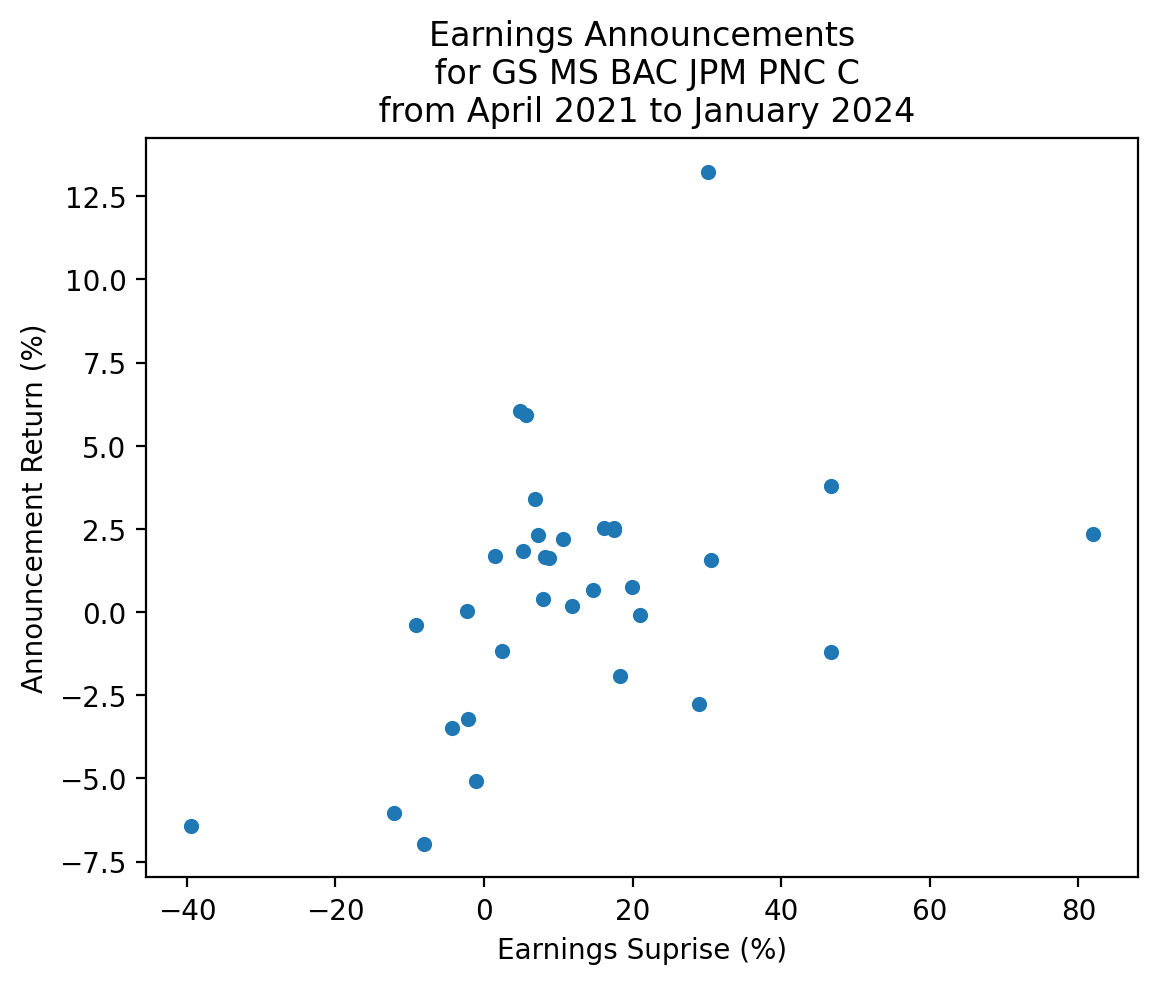

In [20]:
(
    surprises
    [['Surprise(%)', 'Returns']]
    .mul(100)
    .plot(x='Surprise(%)', y='Returns', kind='scatter')
)
plt.xlabel('Earnings Suprise (%)')
plt.ylabel('Announcement Return (%)')

_ = ' '.join(surprises.index.get_level_values('Ticker').unique())
__ = surprises.index.get_level_values('Date')
plt.title(f'Earnings Announcements\n for {_}\n from {__.min():%B %Y} to {__.max():%B %Y}')
plt.show()

In [21]:
import seaborn as sns

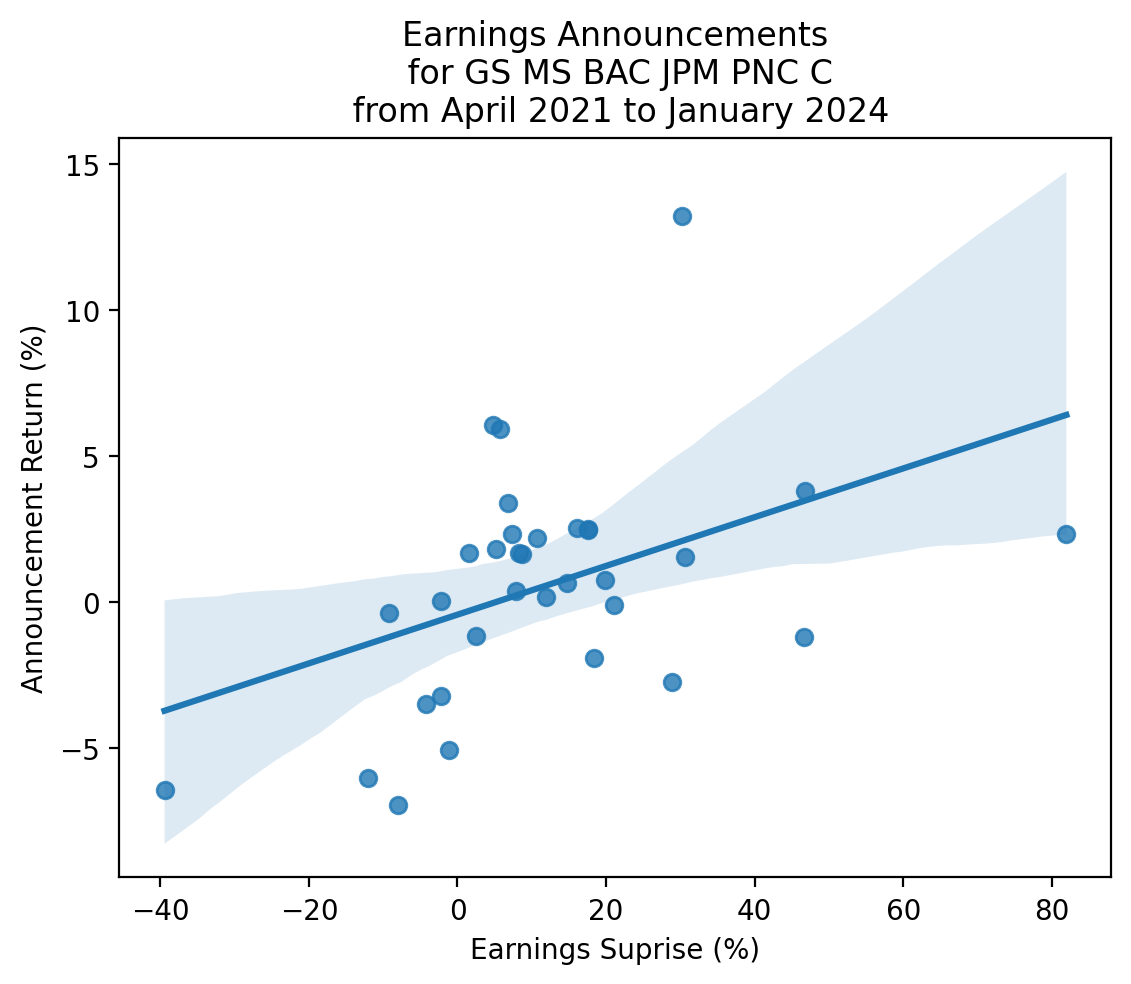

In [22]:
sns.regplot(
    x='Surprise(%)',
    y= 'Returns',
    data=surprises[['Surprise(%)', 'Returns']].mul(100)
)

plt.xlabel('Earnings Suprise (%)')
plt.ylabel('Announcement Return (%)')

_ = ' '.join(surprises.index.get_level_values('Ticker').unique())
__ = surprises.index.get_level_values('Date')
plt.title(f'Earnings Announcements\n for {_}\n from {__.min():%B %Y} to {__.max():%B %Y}')
plt.show()

In [23]:
surprises['ESQ'] = pd.qcut(x=surprises['Surprise(%)'], q=5, labels=False)

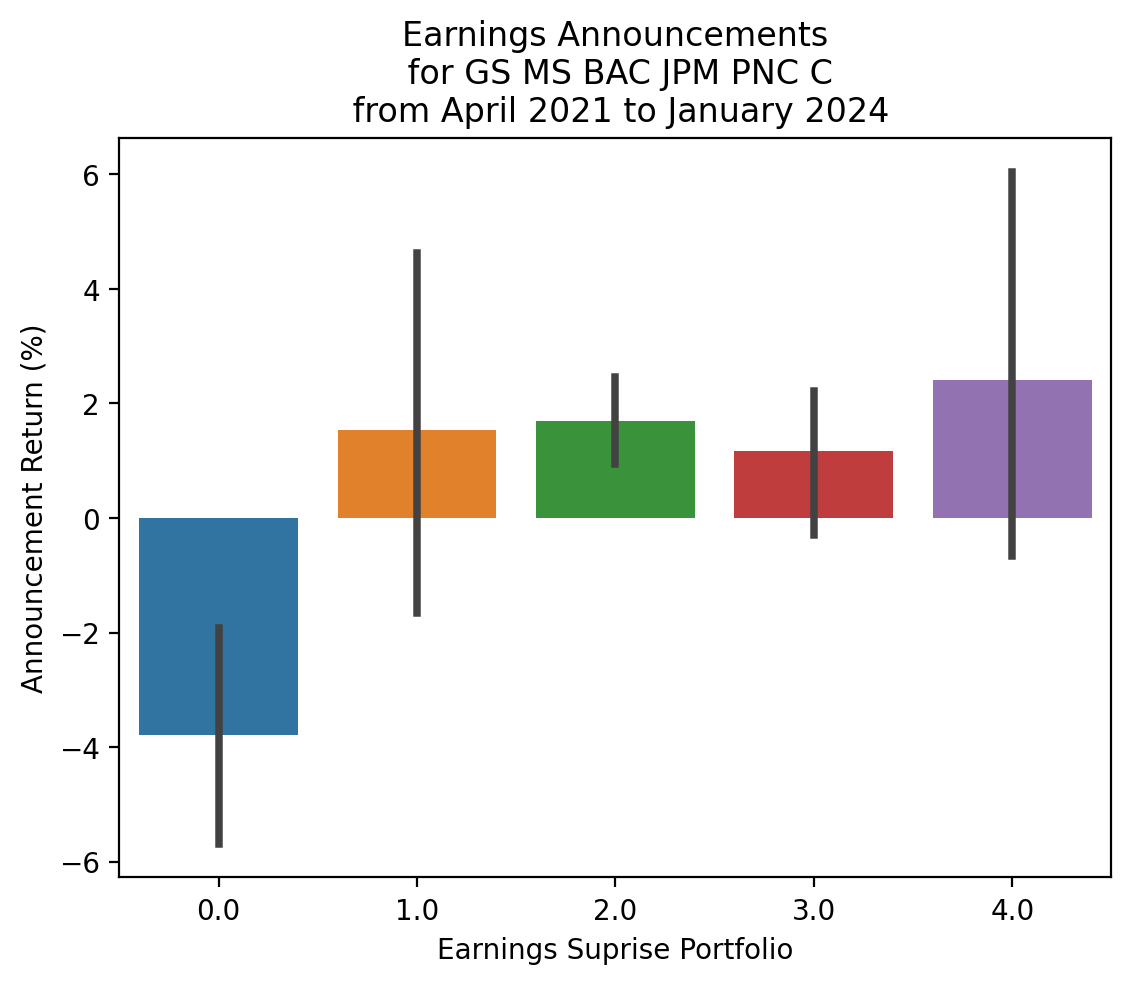

In [24]:
sns.barplot(
    x='ESQ',
    y= 'Returns',
    data=(
        surprises
        [['Surprise(%)', 'Returns']]
        .mul(100)
        .assign(ESQ = lambda x: pd.qcut(x=x['Surprise(%)'], q=5, labels=False))
    )
)

plt.xlabel('Earnings Suprise Portfolio')
plt.ylabel('Announcement Return (%)')

_ = ' '.join(surprises.index.get_level_values('Ticker').unique())
__ = surprises.index.get_level_values('Date')
plt.title(f'Earnings Announcements\n for {_}\n from {__.min():%B %Y} to {__.max():%B %Y}')
plt.show()

***There is a positive relation between announcment returns and earnings surprises!***
Of course, to say more we need more data and to control for market movements, but this analaysis is a start!

### Repeat the earnings exercise with the S&P 100 stocks

In [25]:
wiki = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')

In [26]:
symbols = wiki[2]['Symbol'].str.replace('.', '-', regex=False).to_list()

In [27]:
tickers_2 = yf.Tickers(tickers=symbols, session=session)

In [28]:
returns_2 = (
    tickers_2
    .history(period='max', auto_adjust=False, progress=False)
    .rename_axis(columns=['Variable', 'Ticker'])
    ['Adj Close']
    .pct_change()
    .assign(Date=lambda x: x.index + pd.to_timedelta(16, unit='H'))
    .set_index('Date')
)

returns_2.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02 16:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03 16:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0149
1962-01-04 16:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0024
1962-01-05 16:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0219
1962-01-08 16:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0025


In [29]:
earnings_2 = (
    pd.concat(
        objs=[tickers_2.tickers[t].earnings_dates for t in tickers_2.tickers],
        keys=tickers_2.tickers,
        names=['Ticker', 'Date']
    )
    .rename_axis(columns='Variable')
)

In [30]:
surprises_2 = (
    pd.merge_asof(
        left=earnings_2.sort_index(level=['Date', 'Ticker']),
        right=returns_2.stack().to_frame('Returns').swaplevel().sort_index(level=['Date', 'Ticker']),
        on='Date',
        by='Ticker',
        direction='forward',
        allow_exact_matches=False
    )
    .dropna()
    .set_index(['Date', 'Ticker'])
)

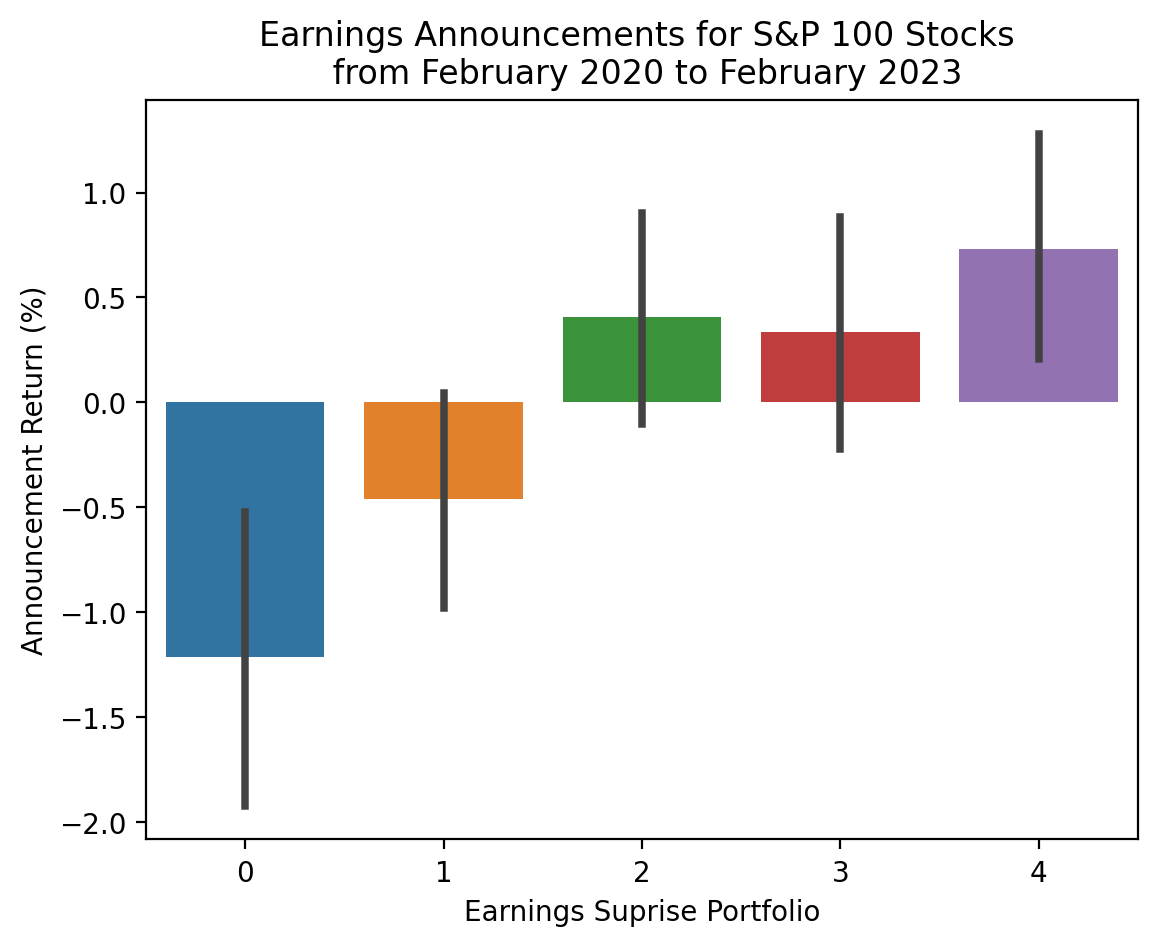

In [31]:
sns.barplot(
    x='ESQ',
    y= 'Returns',
    data=(
        surprises_2
        [['Surprise(%)', 'Returns']]
        .mul(100)
        .assign(ESQ = lambda x: pd.qcut(x=x['Surprise(%)'], q=5, labels=False))
    )
)

plt.xlabel('Earnings Suprise Portfolio')
plt.ylabel('Announcement Return (%)')

__ = surprises_2.index.get_level_values('Date')
plt.title(f'Earnings Announcements for S&P 100 Stocks \n from {__.min():%B %Y} to {__.max():%B %Y}')
plt.show()

### Repeat the earnings exercise with *excess returns* of the S&P 100 Stocks

Excess returns are returns minus market returns.
We need to add a timezone and the closing time to the market return from Fama and French.

In [32]:
Mkt = ff['Mkt-RF'].add(ff['RF'])
Mkt.index = Mkt.index.tz_localize('America/New_York') + pd.to_timedelta(16, unit='H')
returns_3 = returns_2.sub(Mkt, axis=0)

In [33]:
surprises_3 = (
    pd.merge_asof(
        left=earnings_2.sort_index(level=['Date', 'Ticker']),
        right=returns_3.stack().to_frame('Excess Returns').swaplevel().sort_index(level=['Date', 'Ticker']),
        on='Date',
        by='Ticker',
        direction='forward',
        allow_exact_matches=False
    )
    .dropna()
    .set_index(['Date', 'Ticker'])
)

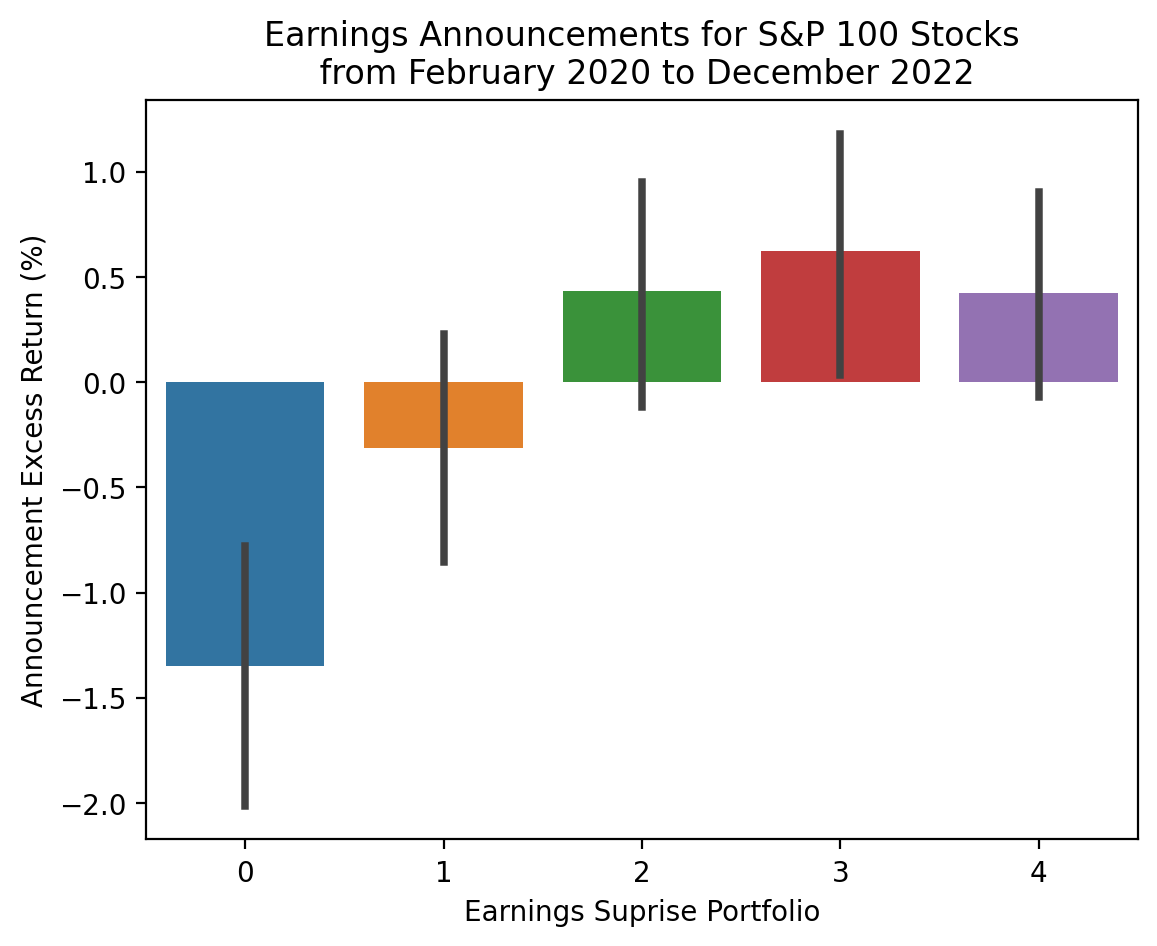

In [34]:
sns.barplot(
    x='ESQ',
    y='Excess Returns',
    data=(
        surprises_3
        [['Surprise(%)', 'Excess Returns']]
        .mul(100)
        .assign(ESQ = lambda x: pd.qcut(x=x['Surprise(%)'], q=5, labels=False))
    )
)

plt.xlabel('Earnings Suprise Portfolio')
plt.ylabel('Announcement Excess Return (%)')

__ = surprises_3.index.get_level_values('Date')
plt.title(f'Earnings Announcements for S&P 100 Stocks\n from {__.min():%B %Y} to {__.max():%B %Y}')
plt.show()

### Improve your `download()` function from above

Modify `download()` to accept one or more than one ticker.
Since we will not use the advanced functionality of the tickers object that `yf.Tickers()` creates, we will use `yf.download()`.
The current version of `yf.download()` does not accept a `session=` argument.

In [35]:
def download(tickers):

    histories = (
        yf.download(tickers, progress=False)
        .assign(Date=lambda x: x.index.tz_localize(None))
        .set_index('Date')
    )

    factors = (
        pdr.DataReader(
            name='F-F_Research_Data_Factors_daily',
            data_source='famafrench',
            start='1900',
            session=session
        )
        [0]
        .div(100)
    )

    if type(histories.columns) is pd.MultiIndex:
        _ = pd.MultiIndex.from_product([['Returns'], histories['Adj Close'].columns])
        histories[_] = histories['Adj Close'].pct_change()

        _ = pd.MultiIndex.from_product([['Factors'], factors.columns])
        histories[_] = factors

        return histories.rename_axis(columns=['Variable', 'Ticker'])

    elif type(histories.columns) is pd.Index:
        return histories.join(ff).rename_axis(columns=['Variable'])

In [36]:
download(tickers='AAPL').head()

Variable,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,
1980-12-12,0.1283,0.1289,0.1283,0.1283,0.0997,469033600,0.0138,-0.0001,-0.0105,0.0006
1980-12-15,0.1222,0.1222,0.1217,0.1217,0.0945,175884800,0.0011,0.0025,-0.0046,0.0006
1980-12-16,0.1133,0.1133,0.1127,0.1127,0.0876,105728000,0.0071,-0.0075,-0.0047,0.0006
1980-12-17,0.1155,0.1161,0.1155,0.1155,0.0897,86441600,0.0152,-0.0086,-0.0034,0.0006
1980-12-18,0.1189,0.1194,0.1189,0.1189,0.0924,73449600,0.0041,0.0022,0.0126,0.0006


In [37]:
download(tickers='AAPL TSLA').head()

Variable   Adj Close       Close        High         Low        Open       \
Ticker          AAPL TSLA   AAPL TSLA   AAPL TSLA   AAPL TSLA   AAPL TSLA   
Date                                                                        
1980-12-12    0.0997  NaN 0.1283  NaN 0.1289  NaN 0.1283  NaN 0.1283  NaN   
1980-12-15    0.0945  NaN 0.1217  NaN 0.1222  NaN 0.1217  NaN 0.1222  NaN   
1980-12-16    0.0876  NaN 0.1127  NaN 0.1133  NaN 0.1127  NaN 0.1133  NaN   
1980-12-17    0.0897  NaN 0.1155  NaN 0.1161  NaN 0.1155  NaN 0.1155  NaN   
1980-12-18    0.0924  NaN 0.1189  NaN 0.1194  NaN 0.1189  NaN 0.1189  NaN   

Variable       Volume      Returns      Factors                         
Ticker           AAPL TSLA    AAPL TSLA  Mkt-RF     SMB     HML     RF  
Date                                                                    
1980-12-12  469033600  NaN     NaN  NaN  0.0138 -0.0001 -0.0105 0.0006  
1980-12-15  175884800  NaN -0.0522  NaN  0.0011  0.0025 -0.0046 0.0006  
1980-12-16  105728000  NaN -0.0734  NaN  0.0071 -0.0075 -0.0047 0.0006  
1980-12-17   86441600  NaN  0.0248  NaN  0.0152 -0.0086 -0.0034 0.0006  
1980-12-18   73449600  NaN  0.0290  NaN  0.0041  0.0022  0.0126 0.0006